# SALES PREDICTION

In [1]:
import numpy as np
import pandas as pd
import seaborn  as sns 
import matplotlib.pyplot as plt

In [2]:
sales_data=pd.read_csv('sales.csv')
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
sales_data.shape

(200, 4)

In [5]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# DATA VISUALIZATION

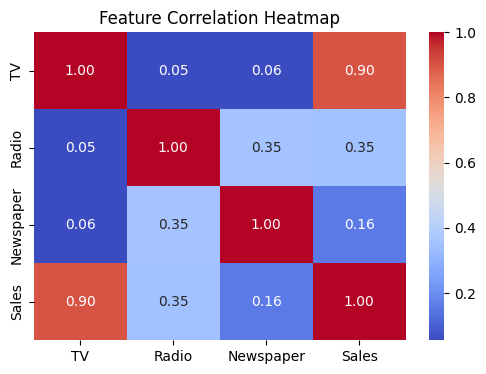

In [8]:
plt.figure(figsize=(6,4))
sns.heatmap(sales_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


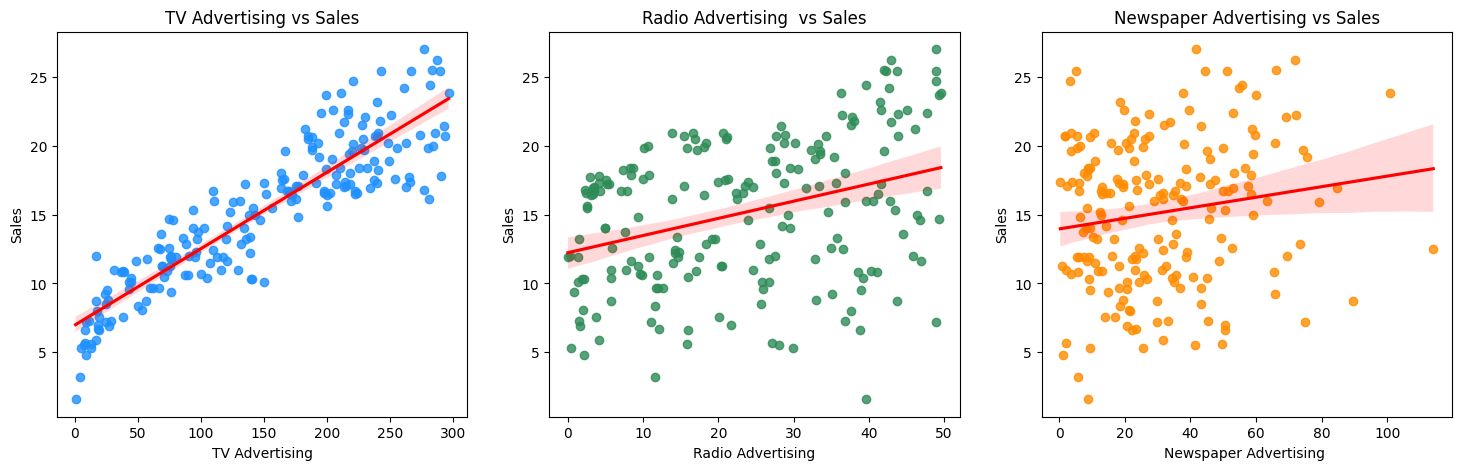

In [17]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. TV vs Sales
sns.regplot(ax=axes[0], x='TV', y='Sales', data=sales_data, scatter_kws={'color':'dodgerblue'}, line_kws={'color':'red'})
axes[0].set_title('TV Advertising vs Sales')
axes[0].set_xlabel('TV Advertising')
axes[0].set_ylabel('Sales')

# 2. Radio vs Sales
sns.regplot(ax=axes[1], x='Radio', y='Sales', data=sales_data, scatter_kws={'color':'seagreen'}, line_kws={'color':'red'})
axes[1].set_title('Radio Advertising  vs Sales')
axes[1].set_xlabel('Radio Advertising')
axes[1].set_ylabel('Sales')

# 3. Newspaper vs Sales
sns.regplot(ax=axes[2], x='Newspaper', y='Sales', data=sales_data, scatter_kws={'color':'darkorange'}, line_kws={'color':'red'})
axes[2].set_title('Newspaper Advertising vs Sales')
axes[2].set_xlabel('Newspaper Advertising ')
axes[2].set_ylabel('Sales')

plt.show()


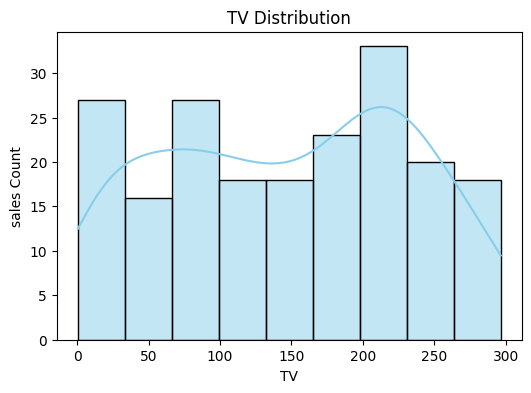

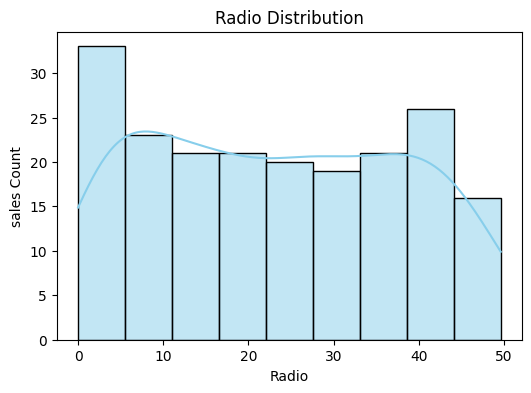

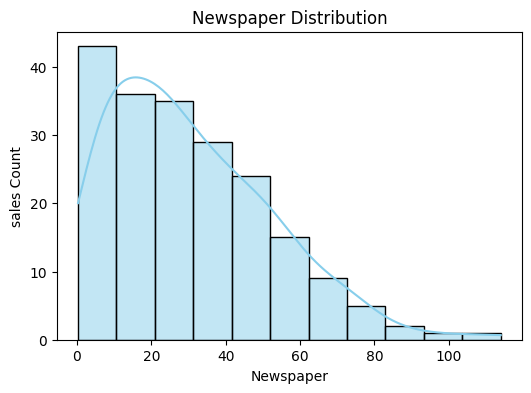

In [18]:
features = ['TV', 'Radio', 'Newspaper']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(sales_data[feature], kde=True, color='skyblue')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('sales Count')
    plt.show()


# MODEL TRAINING

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [12]:
X = sales_data[['TV', 'Radio', 'Newspaper']]
y = sales_data['Sales']

In [13]:
# Split dataset into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:

# Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 2.9077569102710896
R² Score: 0.9059011844150826


# MODEL TESTING

      TV  Radio  Newspaper
0  500.0   48.0       50.0
Sales: 37.031


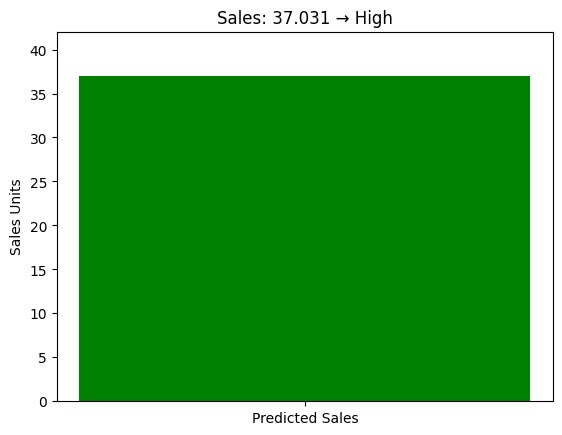

In [21]:

tv = float(input("Enter TV spend : "))
radio = float(input("Enter Radio spend: "))
newspaper = float(input("Enter Newspaper spend : "))

input_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})

print(input_data)


predicted_sales = model.predict(input_data)
sales_value = round(predicted_sales.item(), 3)
print("Sales:", sales_value)

# Classify as Low / Medium / High
if sales_value < 10:
    level = "Low"
elif sales_value < 20:
    level = "Medium"
else:
    level = "High"

color = {'Low': 'red', 'Medium': 'orange', 'High': 'green'}[level]

plt.bar(['Predicted Sales'], [sales_value], color=color)
plt.title(f"Sales: {sales_value} → {level}")
plt.ylabel("Sales Units")
plt.ylim(0, sales_value + 5)
plt.show()